In [86]:
#https://www.emilyzabor.com/survival-analysis-in-r.html
data <- read.csv("data_t3.csv")

In [78]:
# a first look at the data
head(data)
summary(data)

,X,X1,X2,X3,X4,X5
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,4.248,5.321,4.185,4.318,4.123
2,2,4.492,5.022,4.275,4.209,4.083
3,3,4.954,4.848,4.771,4.847,5.337
4,4,4.492,4.766,4.300,4.516,4.793
5,5,4.419,4.352,4.453,4.666,4.008
6,6,5.031,4.800,5.097,4.701,4.986


       X                X1              X2              X3       
 Min.   :  1.00   Min.   :3.837   Min.   :3.585   Min.   :3.454  
 1st Qu.: 25.75   1st Qu.:4.336   1st Qu.:4.303   1st Qu.:4.266  
 Median : 50.50   Median :4.554   Median :4.560   Median :4.500  
 Mean   : 50.50   Mean   :4.534   Mean   :4.581   Mean   :4.529  
 3rd Qu.: 75.25   3rd Qu.:4.726   3rd Qu.:4.878   3rd Qu.:4.778  
 Max.   :100.00   Max.   :5.269   Max.   :5.996   Max.   :5.201  
       X4              X5       
 Min.   :3.754   Min.   :3.295  
 1st Qu.:4.313   1st Qu.:4.232  
 Median :4.569   Median :4.508  
 Mean   :4.547   Mean   :4.517  
 3rd Qu.:4.745   3rd Qu.:4.830  
 Max.   :5.329   Max.   :5.602  

In [79]:
dim(data)

[1] 100   6

In [87]:
# Load necessary libraries
library(readr)
library(ggplot2)
library(coxme)
library(lubridate)
library(irr)
library(survminer)
library(ggsurvfit)
library(gtsummary)
library(tidycmprsk)

In [81]:
library(tidyverse)
library(ggpubr)
library(broom)
library(ggplot2)
library(reshape2)


In [82]:
data_long <- melt(data[-1], variable.name = "Assay", value.name = "CEA")


No id variables; using all as measure variables



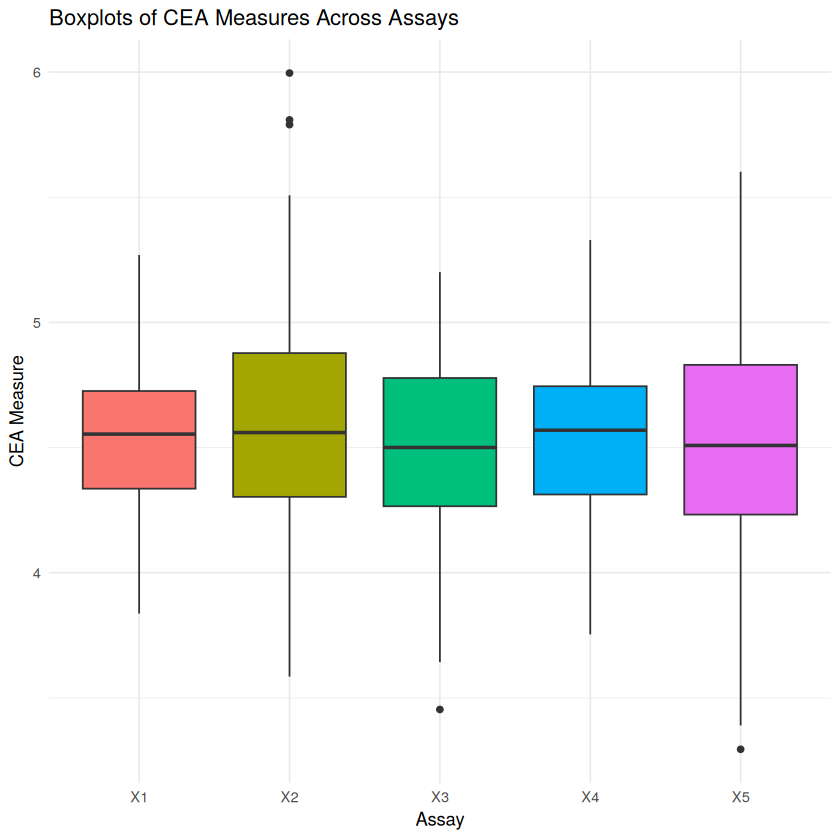

In [83]:
ggplot(data_long, aes(x = Assay, y = CEA, fill = Assay)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Boxplots of CEA Measures Across Assays", 
       y = "CEA Measure", 
       x = "Assay") +
  theme(legend.position = "none")


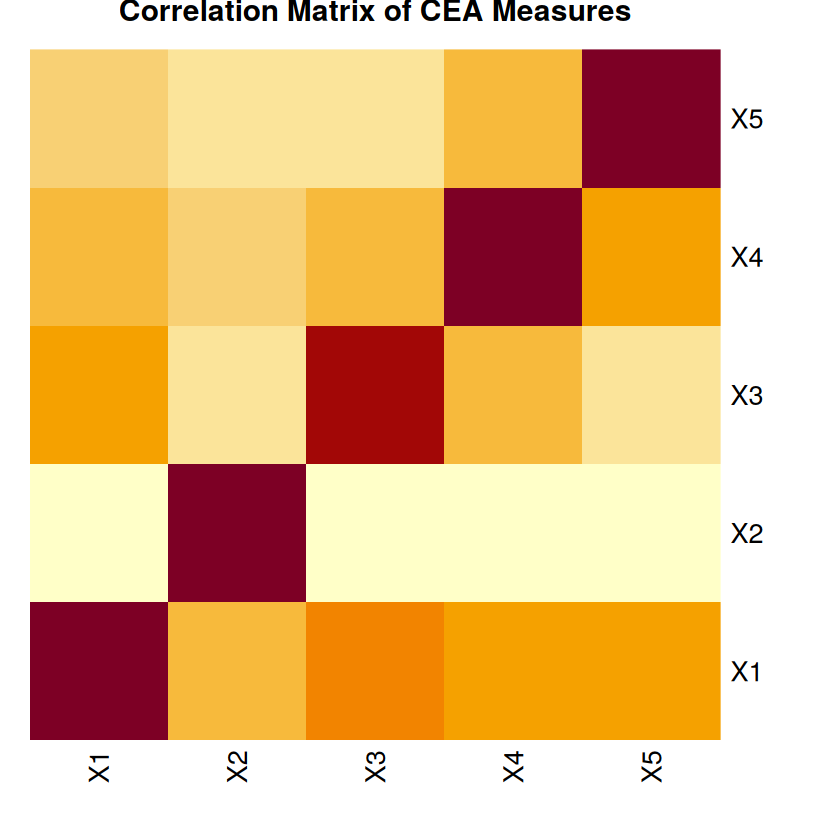

In [84]:
# Compute the correlation matrix
cor_matrix <- cor(data[-1])

# Plotting the heatmap
heatmap(cor_matrix, main = "Correlation Matrix of CEA Measures", 
        Colv = NA, Rowv = NA, scale = "column", margins = c(5, 5))


In [85]:
library(psych)

# Calculate the ICC
icc_result <- ICC(data[-1])

# Convert to data frame (if not already done)
icc_df <- as.data.frame(icc_result$results)

# View the structure to confirm
print(icc_df)

boundary (singular) fit: see help('isSingular')



                         type       ICC        F df1 df2            p
Single_raters_absolute   ICC1 0.4367499 4.877052  99 400 5.016847e-30
Single_random_raters     ICC2 0.4367499 4.877052  99 396 6.621512e-30
Single_fixed_raters      ICC3 0.4367499 4.877052  99 396 6.621512e-30
Average_raters_absolute ICC1k 0.7949581 4.877052  99 400 5.016847e-30
Average_random_raters   ICC2k 0.7949581 4.877052  99 396 6.621512e-30
Average_fixed_raters    ICC3k 0.7949581 4.877052  99 396 6.621512e-30
                        lower bound upper bound
Single_raters_absolute    0.3439548   0.5355998
Single_random_raters      0.3439500   0.5356031
Single_fixed_raters       0.3438419   0.5356767
Average_raters_absolute   0.7238657   0.8522148
Average_random_raters     0.7238615   0.8522164
Average_fixed_raters      0.7237657   0.8522537


Here above we can see the p values are quite significant for all the cases. 
ICC1 - One-way random-effects model. In this model, each subject is rated by a different set of randomly chosen raters. Here, raters are considered as the random effects
ICC2 - Two-way random-effects model. A set of k raters are randomly selected, then, each subject is measured by the same set of k raters with similar characteristics. In this model, both subjects and raters are viewed as random effects. 
ICC3 - Two-way mixed effects model. Here the raters are considered as fixed.

We get the Similar ICC of 0.4467 for all the 3 models showing moderate agreement.

Similarly for Average ICC 1 to 3 the ICC is same and it's 0.749 showing good agreement i.e. the raters are usually consistent when averages are compared. 

## Alternative

In [97]:
kripp.alpha(t(as.matrix(data[-1])), method = "interval")

 Krippendorff's alpha

 Subjects = 100 
   Raters = 5 
    alpha = 0.434 

Krippoendorff's alpha shows a value of 0.434 which shows moderate agreement across all 5 raters. 